# 1. Imports

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("Import completed.")

Import completed.


# 2. Load Data

In [2]:
# Set the path to the dataset
file_path = "../datasets/WELFake_Dataset.csv"

df = pd.read_csv(file_path)
df = df.dropna(subset=["title", "text", "label"])
df["title"] = df["title"].astype(str)
df["text"] = df["text"].astype(str)
df["label"] = df["label"].astype(int)

sample_frac = 1
# sample_frac = 0.5 # Faster training
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Train-test split
split_idx = int(0.8 * len(df))
train_data = df[:split_idx]
test_data = df[split_idx:]

# 3. Build and Train Naive Bayes Classifier

In [3]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(train_data['title'], train_data['label'])

# Predict test data
predicted_categories = model.predict(test_data['title'])

# 4. Compute and Display Metrics

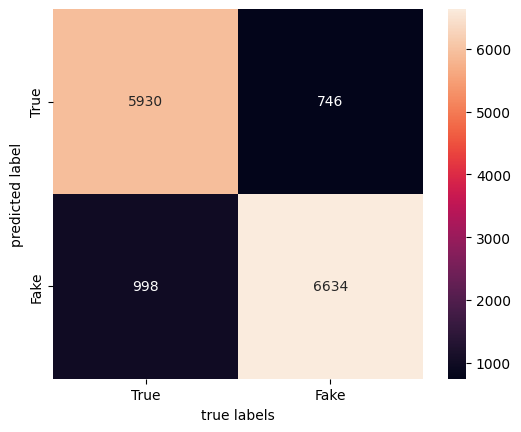

Accuracy: 0.8781101481688566
              precision    recall  f1-score   support

        True       0.89      0.86      0.87      6928
        Fake       0.87      0.90      0.88      7380

    accuracy                           0.88     14308
   macro avg       0.88      0.88      0.88     14308
weighted avg       0.88      0.88      0.88     14308



In [7]:
matrix = confusion_matrix(test_data['label'], predicted_categories)

labels = sorted(df['label'].unique())

sns.heatmap(matrix.T,
            square = True,
            annot=True,
            fmt = "d",
            xticklabels = ["True", "Fake"],
            yticklabels = ["True", "Fake"])

plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

print("Accuracy: {}".format(accuracy_score(test_data['label'], predicted_categories)))

print(classification_report(test_data['label'], predicted_categories, target_names=["True", "Fake"]))

# 5. Hyperparameter Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

params = {
    'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
    'tfidfvectorizer__stop_words': [None, 'english'],
    'multinomialnb__alpha': [0.1, 0.5, 1.0, 1.5]
}

grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
grid.fit(train_data['title'], train_data['label'])

print(f"Best accuracy: {grid.best_score_:.4f}")
print("Best parameters:", grid.best_params_)

best_model = grid.best_estimator_
predicted_categories = model.predict(test_data['title'])
best_accuracy = accuracy_score(test_data['label'], predicted_categories)
print(f"Best model test accuracy: {best_accuracy:.4f}")

Best accuracy: 0.8980
Best parameters: {'multinomialnb__alpha': 0.1, 'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__stop_words': None}
Best model test accuracy: 0.8781
